# Library

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Set And Check For NaN 


In [99]:
dataset = pd.read_csv('Heart_Attack.csv')

In [100]:
missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


## Explore Data Set

In [101]:
for i, col in enumerate(dataset.columns):
    print(f"{i}: {col}")


0: Patient ID
1: Age
2: Sex
3: Cholesterol
4: Blood Pressure
5: Heart Rate
6: Diabetes
7: Family History
8: Smoking
9: Obesity
10: Alcohol Consumption
11: Exercise Hours Per Week
12: Diet
13: Previous Heart Problems
14: Medication Use
15: Stress Level
16: Sedentary Hours Per Day
17: Income
18: BMI
19: Triglycerides
20: Physical Activity Days Per Week
21: Sleep Hours Per Day
22: Country
23: Continent
24: Hemisphere
25: Heart Attack Risk


In [102]:
print(dataset.dtypes)


Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [103]:
dataset_Cleaned = dataset.drop(columns=['Patient ID','Country','Continent','Hemisphere'])

In [104]:
bp_split = dataset_Cleaned['Blood Pressure'].str.split('/', expand=True)
dataset_Cleaned['Systolic BP'] = pd.to_numeric(bp_split[0], errors='coerce')
dataset_Cleaned['Diastolic BP'] = pd.to_numeric(bp_split[1], errors='coerce')

dataset_Cleaned = dataset_Cleaned.drop(columns=['Blood Pressure'])

In [105]:
dataset_Cleaned.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic BP,Diastolic BP
0,67,Male,208,72,0,0,1,0,0,4.168189,...,9,6.615001,261404,31.251233,286,0,6,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,1,4.963459,285768,27.194973,235,1,7,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,9,9.463426,235282,28.176571,587,4,4,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,9,7.648981,125640,36.464704,378,3,4,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,6,1.514821,160555,21.809144,231,1,5,0,91,88


## Split Data Set


In [106]:
from sklearn.model_selection import train_test_split

X = dataset_Cleaned.drop(columns='Heart Attack Risk')
y = dataset_Cleaned['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [107]:
print(X_train)

      Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
5286   54    Male          262         105         1               0        1   
1119   69  Female          293         100         1               0        1   
5315   53    Male          297          74         1               1        1   
3160   33    Male          346          80         1               1        1   
6791   83    Male          386          91         1               1        1   
...   ...     ...          ...         ...       ...             ...      ...   
4373   36    Male          228          92         0               0        1   
7891   19    Male          266          51         0               0        1   
4859   67    Male          254         107         1               0        1   
3264   51    Male          399          97         1               0        1   
2732   37    Male          272          44         0               0        1   

      Obesity  Alcohol Cons

In [108]:
print(y_train)

5286    0
1119    1
5315    0
3160    0
6791    0
       ..
4373    1
7891    0
4859    0
3264    1
2732    0
Name: Heart Attack Risk, Length: 7010, dtype: int64


## Feature Scaling & One Hot-Encoding


In [109]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit ONLY on training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Get column names
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
transformed_columns = numeric_features.tolist() + encoded_cat_features.tolist()

# Rebuild DataFrames
X_train_df = pd.DataFrame(X_train_transformed, columns=transformed_columns, index=X_train.index) # type: ignore
X_test_df = pd.DataFrame(X_test_transformed, columns=transformed_columns, index=X_test.index) # type: ignore



In [110]:

X_train_df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic BP,Diastolic BP,Sex_Male,Diet_Healthy,Diet_Unhealthy
5286,0.009433,0.023237,1.443511,0.725879,-0.970201,0.334125,-1.004289,-1.220750,0.640390,0.998574,...,-1.177036,0.070324,-1.689888,-1.076667,-1.519983,1.210798,-1.576209,1.0,0.0,1.0
1119,0.715405,0.406984,1.200381,0.725879,-0.970201,0.334125,-1.004289,-1.220750,-0.901186,-1.001428,...,-0.585186,-0.796297,1.359103,-0.640197,-0.012828,0.299025,-1.371789,0.0,0.0,0.0
5315,-0.037632,0.456500,-0.063894,0.725879,1.030714,0.334125,0.995730,0.819168,0.527288,-1.001428,...,-0.635954,-0.026344,-0.970112,-0.640197,-0.012828,0.868883,-0.077131,1.0,0.0,1.0
3160,-0.978928,1.063067,0.227862,0.725879,1.030714,0.334125,0.995730,-1.220750,-0.388160,0.998574,...,-1.578184,-1.473522,-1.256234,-0.203727,-0.012828,-0.764710,1.217527,1.0,0.0,0.0
6791,1.374312,1.558224,0.762748,0.725879,1.030714,0.334125,-1.004289,-1.220750,1.507269,0.998574,...,1.159836,-0.293858,1.466398,1.542152,-0.012828,-1.714474,-1.031090,1.0,0.0,1.0


In [111]:
y_train.head()

5286    0
1119    1
5315    0
3160    0
6791    0
Name: Heart Attack Risk, dtype: int64

## Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression(random_state = 0, class_weight='balanced')
classifier_LR.fit(X_train_df, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [113]:
y_pred_LR = classifier_LR.predict(X_test_df)

## K-Nearest Neighbour (KNN)

In [114]:
from sklearn.neighbors import KNeighborsClassifier

classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # p=2 is the default value for Euclidean distance
                                                                                # p=1 is the default value for Manhattan distance
classifier_KNN.fit(X_train_df, y_train)

KNeighborsClassifier()

In [115]:
y_pred_KNN = classifier_KNN.predict(X_test_df)

## Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF = RandomForestClassifier(n_estimators=250, random_state=0, class_weight='balanced')
classifier_RF.fit(X_train_df, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=250,
                       random_state=0)

In [117]:
y_pred_RF = classifier_RF.predict(X_test_df)

## Confusion Matrix & Evaluation

In [118]:
# Logistic Regression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_LR))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_LR))
print("Classification Report:\n", classification_report(y_test, y_pred_LR, zero_division=0))

Accuracy: 0.49914432401597264
Confusion Matrix:
 [[565 549]
 [329 310]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.51      0.56      1114
           1       0.36      0.49      0.41       639

    accuracy                           0.50      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.53      0.50      0.51      1753



In [119]:
# K- Nearest Neighbors (KNN)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_KNN))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_KNN))
print("Classification Report:\n", classification_report(y_test, y_pred_KNN, zero_division=0))

Accuracy: 0.5710211066742726
Confusion Matrix:
 [[852 262]
 [490 149]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.76      0.69      1114
           1       0.36      0.23      0.28       639

    accuracy                           0.57      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.54      0.57      0.54      1753



In [120]:
# Random Forest Regressor

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_RF))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_RF))
print("Classification Report:\n", classification_report(y_test, y_pred_RF, zero_division=0))

# perform Worse


Accuracy: 0.6337706788362807
Confusion Matrix:
 [[1109    5]
 [ 637    2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1114
           1       0.29      0.00      0.01       639

    accuracy                           0.63      1753
   macro avg       0.46      0.50      0.39      1753
weighted avg       0.51      0.63      0.50      1753



## Checking Correlation matrix For Further Diagnose

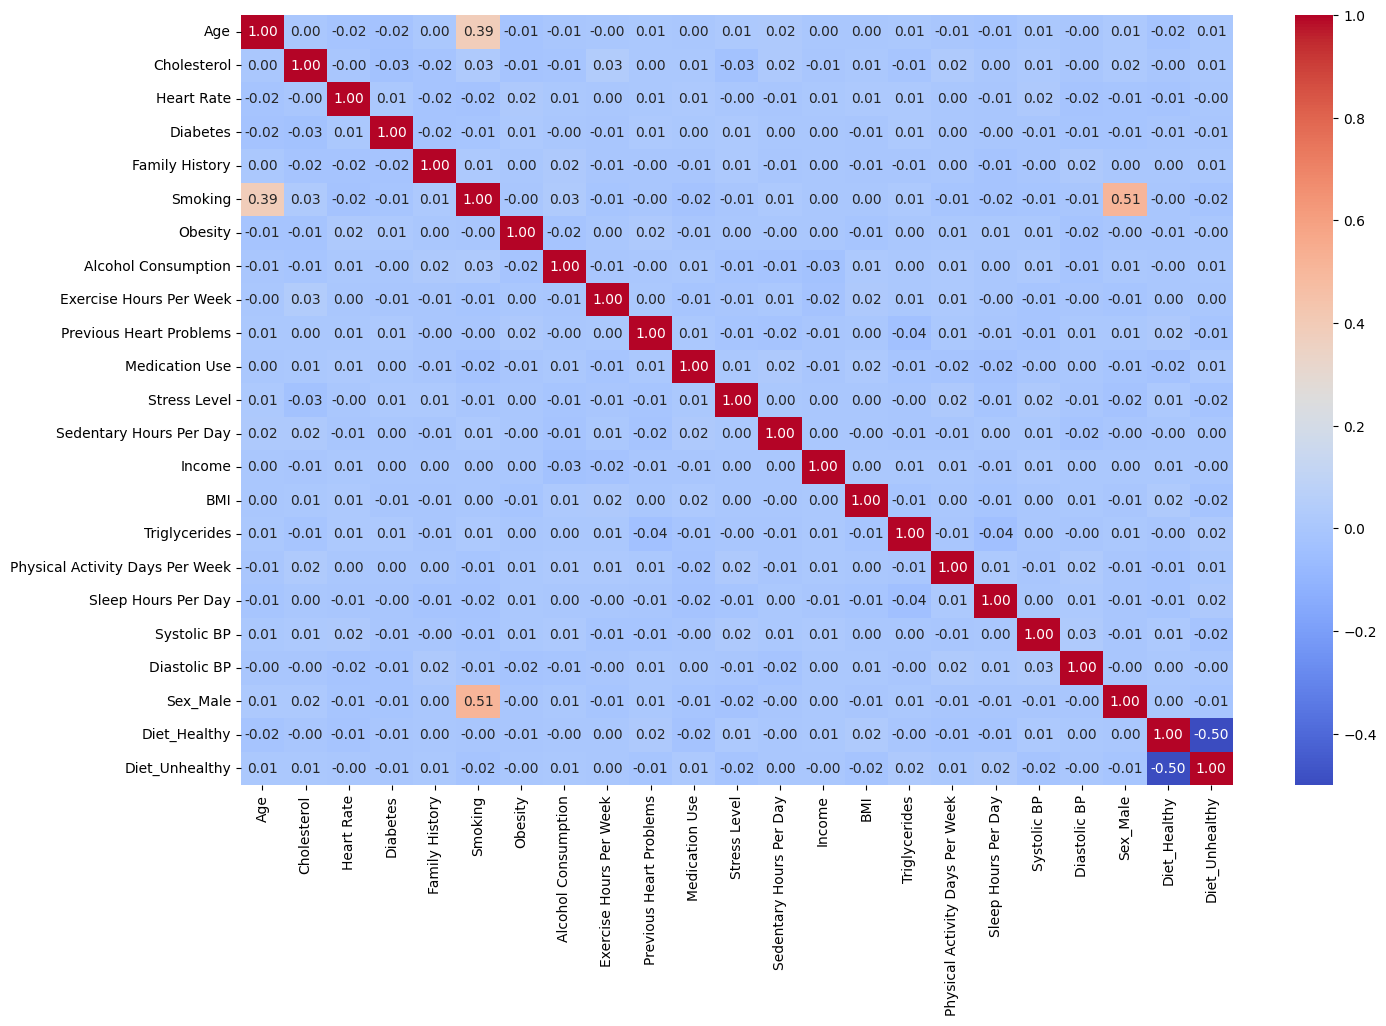

In [121]:
import seaborn as sns
import pandas as pd


# Select top N features (for example, top 10 features)
top_n_features = X_train_df.columns[:30]  # Adjust as necessary
corr_matrix = X_train_df[top_n_features].corr()

plt.figure(figsize=(16, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.show()